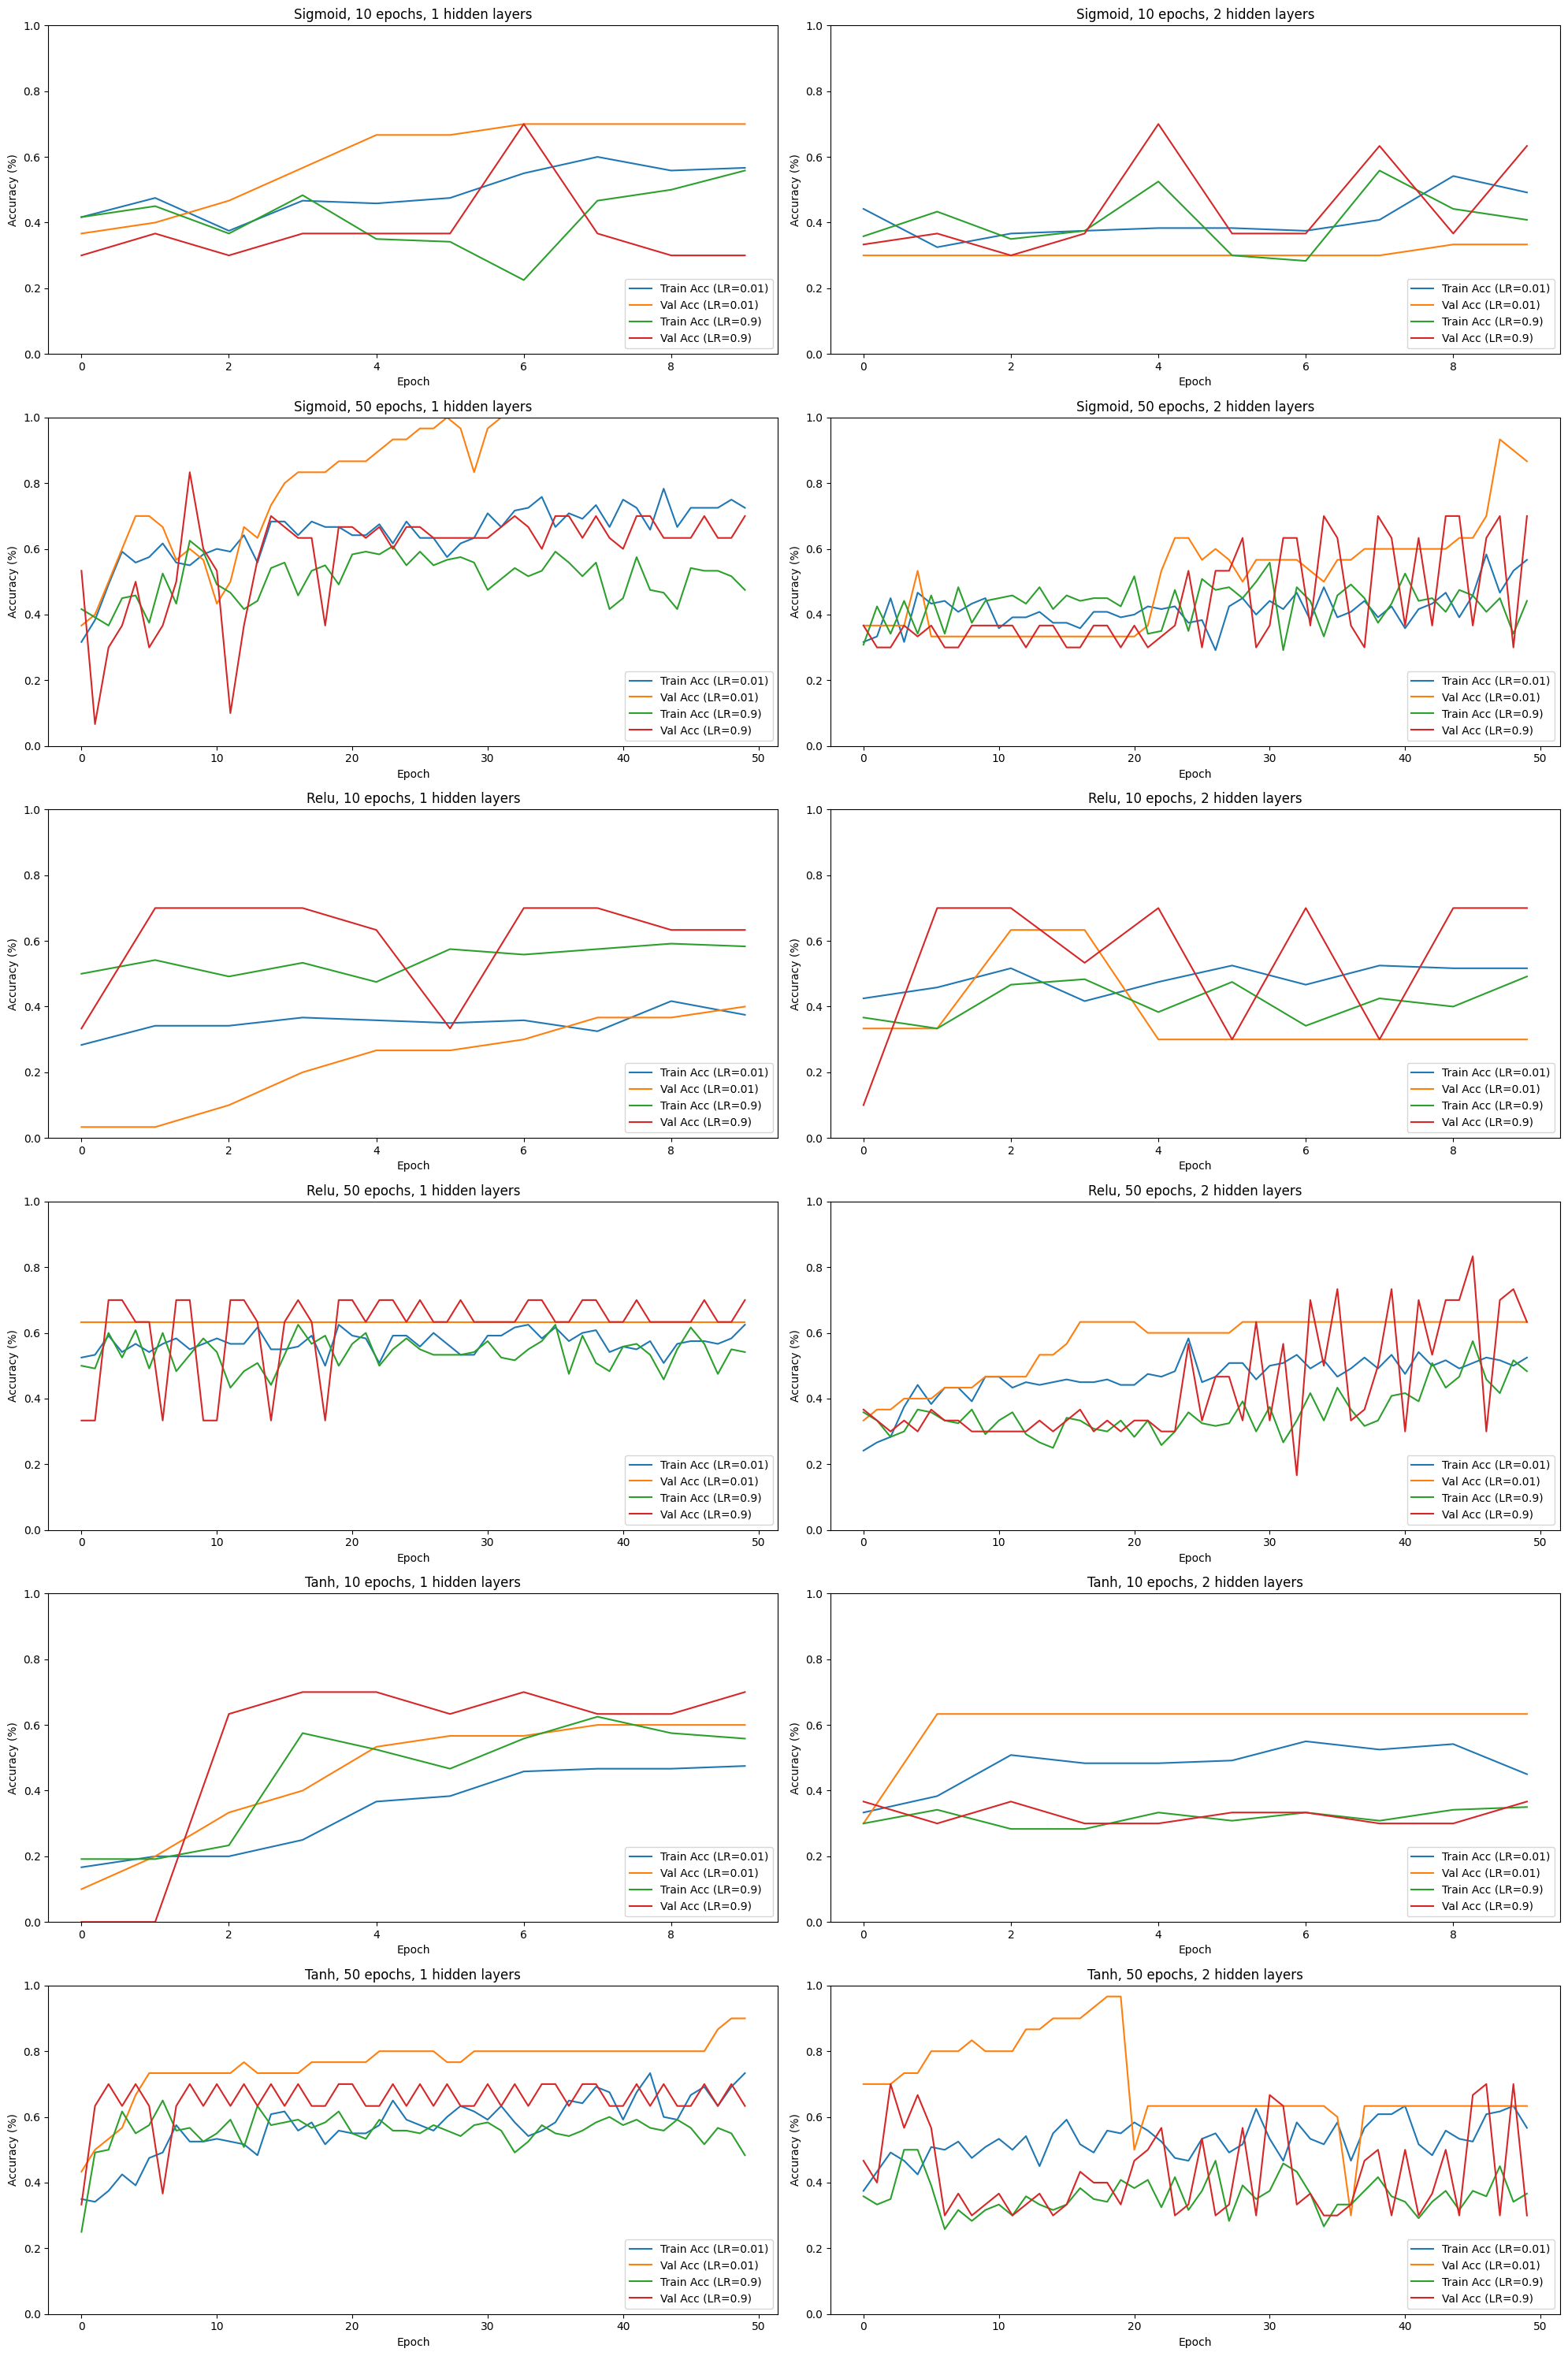

,Activation,Learning Rate,Epochs,Number of Hidden Layers,Training Accuracy (%),Testing Accuracy (%),Training Loss (%),Testing Loss (%)
0,sigmoid,0.01,10,1,64.17,70.00,90.53,88.95
1,sigmoid,0.90,10,1,34.17,30.00,114.16,114.11
2,sigmoid,0.01,10,2,33.33,33.33,108.81,109.13
3,sigmoid,0.90,10,2,66.67,63.33,82.54,83.20
4,sigmoid,0.01,50,1,97.50,100.00,67.34,65.24
5,sigmoid,0.90,50,1,64.17,70.00,62.53,56.36
6,sigmoid,0.01,50,2,76.67,86.67,101.79,100.73
7,sigmoid,0.90,50,2,65.00,70.00,77.59,74.87
8,relu,0.01,10,1,40.83,40.00,108.00,106.42
9,relu,0.90,10,1,67.50,63.33,60.53,61.68


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from sklearn.datasets import load_iris

class NeuralNet:
    def __init__(self):
        # Load Iris dataset
        iris = load_iris()
        self.raw_input = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                                      columns=iris['feature_names'] + ['target'])
        self.label_encoder = LabelEncoder()
        # Encode target labels with value between 0 and n_classes-1.
        self.raw_input['target'] = self.label_encoder.fit_transform(self.raw_input['target'])

        
    def preprocess(self):
        # standardization, normalization,
        #   categorical to numerical, etc
        scaler = StandardScaler()
        features = self.raw_input.drop('target', axis=1)
        features_scaled = scaler.fit_transform(features)
        self.processed_data = pd.DataFrame(features_scaled, columns=features.columns)
        self.processed_data['target'] = self.raw_input['target']
        return 0

    def build_model(self, input_dim, num_hidden_layers, activation, learning_rate, dropout_rate=0.3):
        model = Sequential()
        model.add(Input(shape=(input_dim,)))
        nodesInHiddenLayer = 1
        for _ in range(num_hidden_layers):
            model.add(Dense(nodesInHiddenLayer, activation=activation))
            model.add(Dropout(dropout_rate))
            model.add(BatchNormalization())
        model.add(Dense(3, activation='softmax'))
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model

    # specified in the init method. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all
    #       the models in a single plot. The plot should be color coded i.e.
    #       different color for each model
    def train_evaluate(self):
        X = self.processed_data.drop('target', axis=1).values
        y = self.processed_data['target'].values
        y = tf.keras.utils.to_categorical(y, num_classes=3)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Hyperparameters
        activations = ['sigmoid', 'relu', 'tanh']
        epochs = [10, 50]
        num_hidden_layers_options = [1, 2]  # Number of hidden layers
        learning_rates = [0.01, .9]

        results = []

        # Correct number of subplots to match total plots
        num_subplots = len(activations) * len(epochs) * len(num_hidden_layers_options)
        cols = 2
        rows = (num_subplots // cols) + (num_subplots % cols != 0)  # Calculate the number of rows needed
        fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
        axes = axes.flatten()

        plot_index = 0

        for activation in activations:
            for epoch in epochs:
                for num_hidden_layers in num_hidden_layers_options:
                    ax = axes[plot_index]
                    for learning_rate in learning_rates:
                        model = self.build_model(input_dim=X_train.shape[1], num_hidden_layers=num_hidden_layers, activation=activation, learning_rate=learning_rate)

                        history = model.fit(X_train, y_train, epochs=epoch, batch_size=32, validation_data=(X_test, y_test), verbose=0)

                        train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
                        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

                        results.append({
                            'Activation': activation,
                            'Learning Rate': learning_rate,
                            'Epochs': epoch,
                            'Number of Hidden Layers': num_hidden_layers,
                            'Training Accuracy (%)': round(train_acc * 100, 2),
                            'Testing Accuracy (%)': round(test_acc * 100, 2),
                            'Training Loss (%)': round(train_loss * 100, 2),
                            'Testing Loss (%)': round(test_loss * 100, 2)
                        })

                        label_suffix = f'LR={learning_rate}'
                        ax.plot(history.history['accuracy'], label=f'Train Acc ({label_suffix})')
                        ax.plot(history.history['val_accuracy'], label=f'Val Acc ({label_suffix})')

                    ax.set_title(f'{activation.capitalize()}, {epoch} epochs, {num_hidden_layers} hidden layers')
                    ax.set_ylabel('Accuracy (%)')
                    ax.set_xlabel('Epoch')
                    ax.legend(loc='lower right')

                    plot_index += 1

        for ax in axes:
            ax.set_ylim(0, 1)  # Ensure consistent y-axis across all plots

        plt.tight_layout()
        plt.show()

        results_df = pd.DataFrame(results)
        display(results_df)  # Use display() to show DataFrame in a Jupyter Notebook

# Execution in a Jupyter Notebook cell
neural_net = NeuralNet()
neural_net.preprocess()
neural_net.train_evaluate()
